# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join('Resources/city_data.csv')
ride_data_to_load = os.path.join('Resources/ride_data.csv')

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load , encoding="ISO-8859-1")
ride_data_df = pd.read_csv(ride_data_to_load , encoding="ISO-8859-1")

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_df = pyber_data_df.groupby(["type"]).count()["ride_id"] 
total_rides_df.name = "Total Rides"
total_rides_df

type
Rural        125
Suburban     625
Urban       1625
Name: Total Rides, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_driver_df = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_df.name = "Total Drivers"
total_driver_df

type
Rural         78
Suburban     490
Urban       2405
Name: Total Drivers, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fare_df = pyber_data_df.groupby(["type"]).sum()["fare"] 
total_fare_df.name = "Total Fare"
total_fare_df

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_df = total_fare_df / total_rides_df
avg_fare_df.name = "Average Fare per Ride"
avg_fare_df

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average Fare per Ride, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_driver_df = total_fare_df / total_driver_df
avg_driver_df.name = "Average Fare per Driver"
avg_driver_df

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
Name: Average Fare per Driver, dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
PyBer_summary_df = pd.DataFrame([total_rides_df,total_driver_df,total_fare_df,avg_fare_df, avg_driver_df]).transpose()
PyBer_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125.0,78.0,4327.93,34.623440,55.486282
Suburban,625.0,490.0,19356.33,30.970128,39.502714
Urban,1625.0,2405.0,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None
PyBer_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125.0,78.0,4327.93,34.623440,55.486282
Suburban,625.0,490.0,19356.33,30.970128,39.502714
Urban,1625.0,2405.0,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
PyBer_summary_df.loc[:,"Total Fare"]= PyBer_summary_df["Total Fare"].apply('${:,.2f}'.format)
PyBer_summary_df.loc[:,"Average Fare per Ride"] = PyBer_summary_df["Average Fare per Ride"].apply('${:,.2f}'.format)
PyBer_summary_df.loc[:,"Average Fare per Driver"] = PyBer_summary_df["Average Fare per Driver"].apply('${:,.2f}'.format)
PyBer_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125.0,78.0,"$4,327.93",$34.62,$55.49
Suburban,625.0,490.0,"$19,356.33",$30.97,$39.50
Urban,1625.0,2405.0,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_type_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
date_type_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_type_df = date_type_df.reset_index()
date_type_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [14]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_type_df["date"]= pd.to_datetime(date_type_df["date"])

In [15]:
# 7. Check that the datatype for the index is datetime using df.info()
date_type_df.dtypes

type            object
date    datetime64[ns]
fare           float64
dtype: object

In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_type_pivot = date_type_df.pivot(index="date",columns ="type",values="fare")
date_type_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
farecount_jan_april = date_type_pivot.loc["2019-01-01":"2019-04-29"]
farecount_jan_april


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = farecount_jan_april.resample("W").sum()
weekly_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


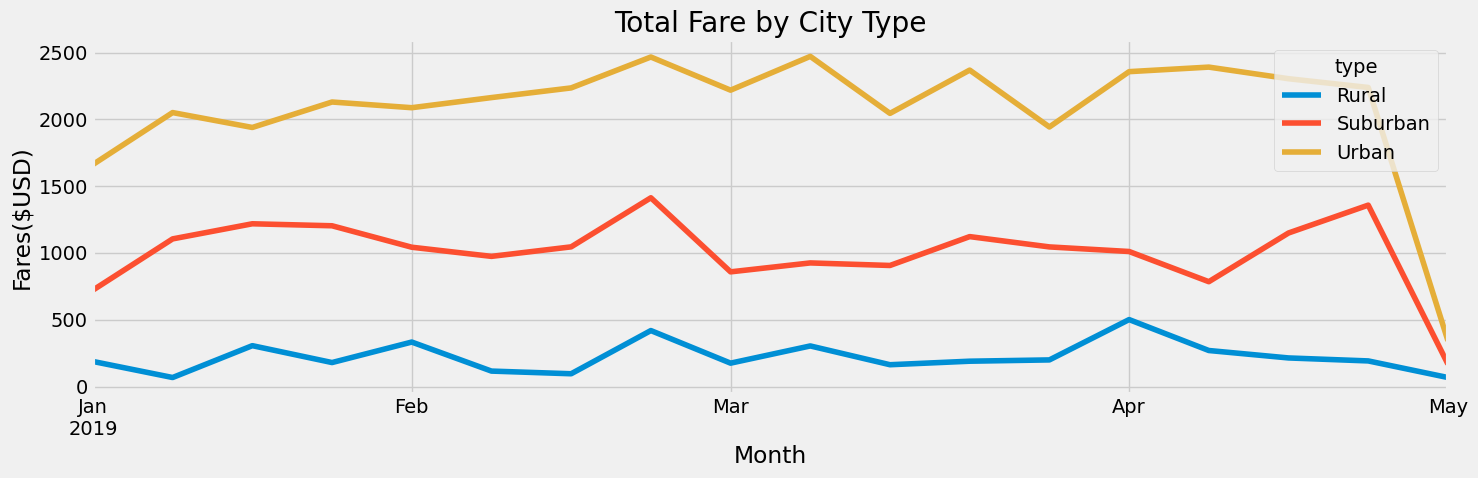

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_fares = weekly_fares_df.plot(figsize = (15,5))
# Add a title 
weekly_fares.set_title("Total Fare by City Type")
#  Add a x- and y-axis label.
weekly_fares.set_xlabel("Month")
weekly_fares.set_ylabel("Fares($USD)")
plt.tight_layout()
plt.savefig("images/PyBer_fare_summary.png")
plt.show()
